In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import xgboost as xgb
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
from sklearn.utils import resample
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score , cross_validate 
%load_ext autoreload
%autoreload 2

# Case For UpSample

In [2]:
from sklearn.model_selection import train_test_split
def read_and_split_data(file):
    df = pd.read_csv(file)
    x=df.drop(['TARGET_5Yrs','TARGET_5Yrs_Inv'],axis=1)
    y=df['TARGET_5Yrs_Inv']
    x_data , x_test ,y_data,  y_test = train_test_split(x, y, test_size=0.2, random_state = 8, stratify=y)
    x_train , x_val , y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state = 8, stratify=y_data)
    print('y',y.value_counts())
    print('y_train',y_train.value_counts())
    print('y_val', y_val.value_counts())
    print('y_test',y_test.value_counts())
    return x_train , x_val , y_train, y_val, x_test,  y_test

In [3]:
x_train , x_val , y_train, y_val, x_test,  y_test = read_and_split_data("../data/processed/df_cleaned_upsampled_nba_prediction.csv")

y 0    6669
1    6669
Name: TARGET_5Yrs_Inv, dtype: int64
y_train 0    4268
1    4268
Name: TARGET_5Yrs_Inv, dtype: int64
y_val 0    1067
1    1067
Name: TARGET_5Yrs_Inv, dtype: int64
y_test 0    1334
1    1334
Name: TARGET_5Yrs_Inv, dtype: int64


c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score:  0.5  F1 Score  0.0  Precision Score  0.0  Recall Score  0.0 (BASELINE)


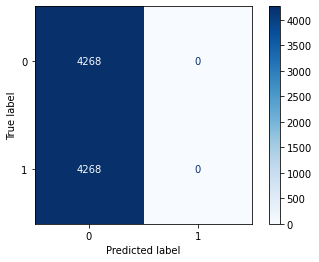

In [4]:
evb.eval_baseline(x_train,y_train)

[15:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


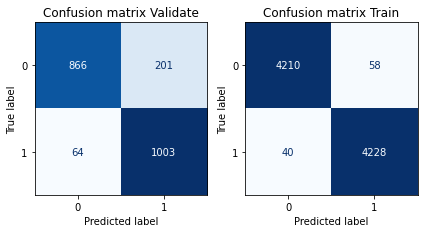

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=1),
 0.9992917147201247,
 0.9454821258703421)

In [5]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=1,use_label_encoder=False),x_train,y_train,x_val,y_val)

In [6]:
rf_data = [
    ['max_depth',2],
    ['max_depth',6],
    ['max_depth',12],
    ['max_depth',25],
    ['max_depth',50],
    ['min_child_weight',1],
    ['min_child_weight',2],
    ['min_child_weight',3],
    ['min_child_weight',5],
    ['min_child_weight',10],
    ['min_child_weight',15],
    ['min_child_weight',50],
    ['Colsample_bytree',0.1],
    ['Colsample_bytree',0.3],
    ['Colsample_bytree',0.6],
    ['Colsample_bytree',0.9],
    ['Colsample_bytree',1],
    ['subsample',0.1],
    ['subsample',0.3],
    ['subsample',0.6],
    ['subsample',0.9],
    ['subsample',1],
    ['reg_lambda',0.1],
    ['reg_lambda',0.3],
    ['reg_lambda',0.6],
    ['reg_lambda',0.9],
    ['reg_lambda',1],
    ['reg_alpha',0.1],
    ['reg_alpha',0.3],
    ['reg_alpha',0.6],
    ['reg_alpha',0.9],
    ['reg_alpha',1],
]
rf_data
rf_param = pd.DataFrame(rf_data, columns = ['param', 'value']) 
rf_param

,param,value
0,max_depth,2.0
1,max_depth,6.0
2,max_depth,12.0
3,max_depth,25.0
4,max_depth,50.0
5,min_child_weight,1.0
6,min_child_weight,2.0
7,min_child_weight,3.0
8,min_child_weight,5.0
9,min_child_weight,10.0


# Tunning max_depth

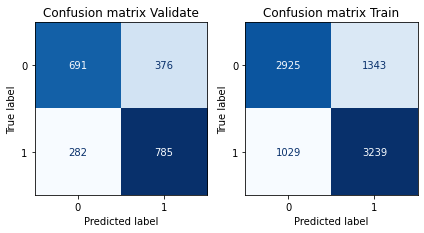

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
max_depth 2.0


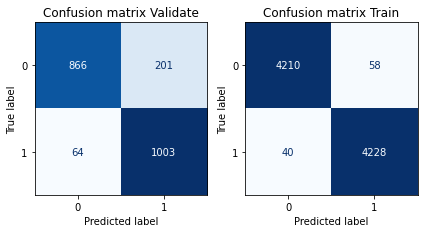

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
max_depth 6.0


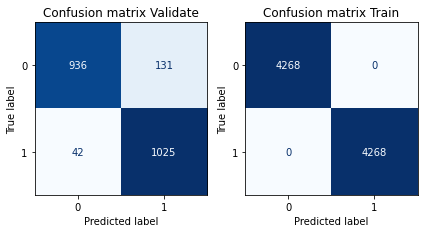

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
max_depth 12.0


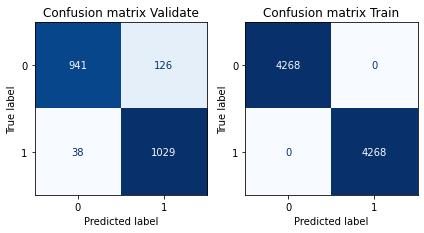

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
max_depth 25.0


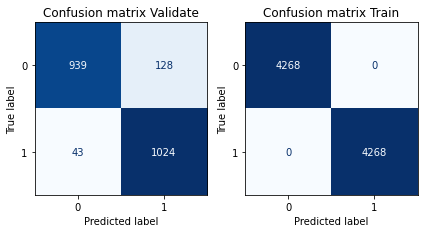

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
max_depth 50.0


In [7]:
for _,row in rf_param[rf_param['param']=='max_depth'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth=int(row.value)) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

# Taking max_depth = , Tunning min_child_weight

In [8]:
max_depth = 6

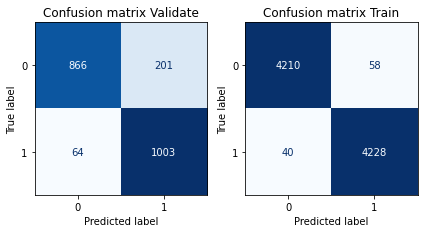

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 1.0


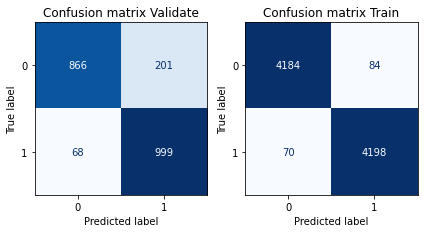

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 2.0


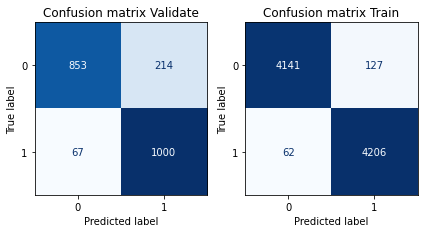

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 3.0


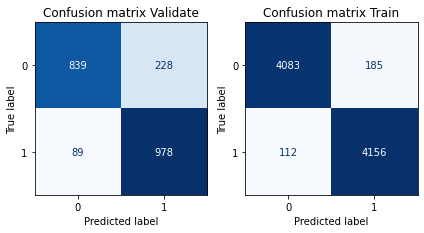

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 5.0


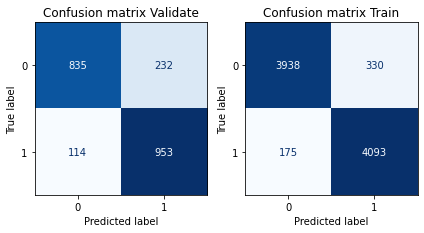

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 10.0


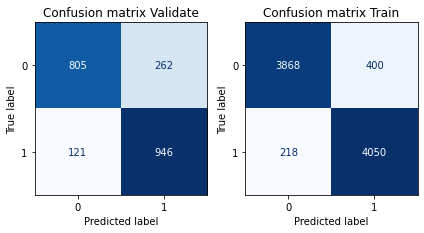

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 15.0


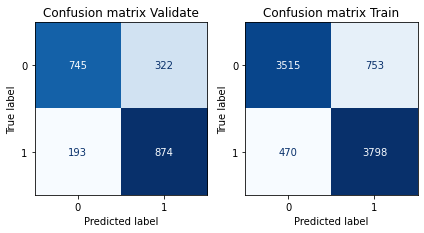

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=50, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
min_child_weight 50.0


In [9]:
for _,row in rf_param[rf_param['param']=='min_child_weight'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight=int(row.value)) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

# Taking min_child_weight = , Tunning Colsample_bytree

In [10]:
min_child_weight=2

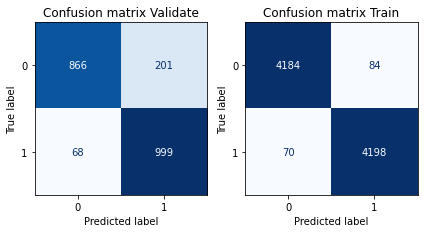

XGBClassifier(Colsample_bytree=0.1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
Colsample_bytree 0.1


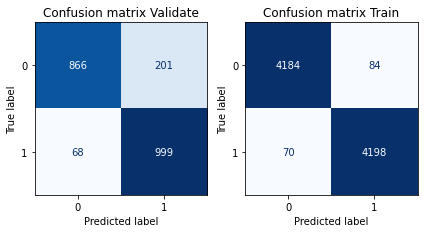

XGBClassifier(Colsample_bytree=0.3, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
Colsample_bytree 0.3


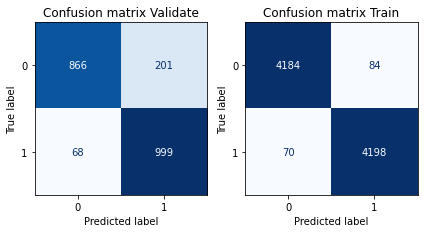

XGBClassifier(Colsample_bytree=0.6, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
Colsample_bytree 0.6


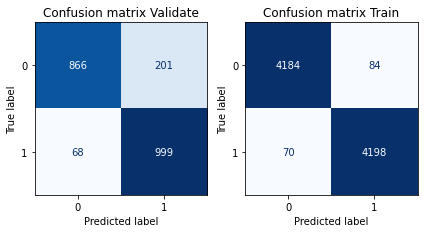

XGBClassifier(Colsample_bytree=0.9, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
Colsample_bytree 0.9


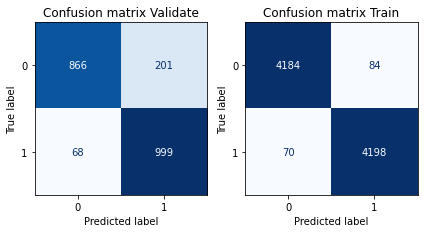

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
Colsample_bytree 1.0


In [11]:
for _,row in rf_param[rf_param['param']=='Colsample_bytree'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight = min_child_weight,Colsample_bytree=row.value) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

# Taking Colsample_bytree = 1.0 (DEFAULT), Tunning subsample

In [12]:
Colsample_bytree=1.0

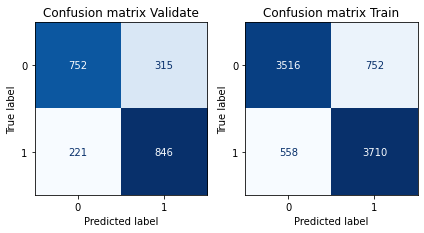

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
subsample 0.1


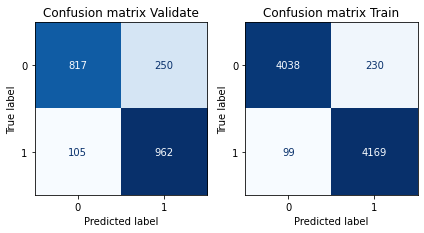

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
subsample 0.3


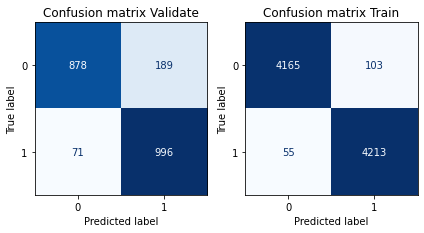

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
subsample 0.6


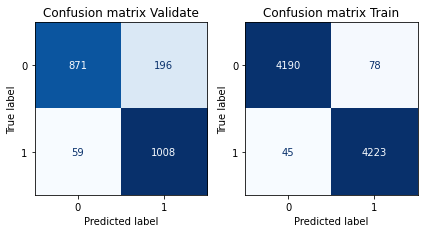

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
subsample 0.9


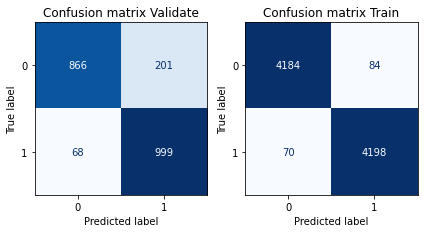

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
subsample 1.0


In [13]:
for _,row in rf_param[rf_param['param']=='subsample'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight = min_child_weight,Colsample_bytree= Colsample_bytree, subsample=row.value) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

# Taking subsample = , Tunning reg_lambda

In [14]:
subsample = 0.6

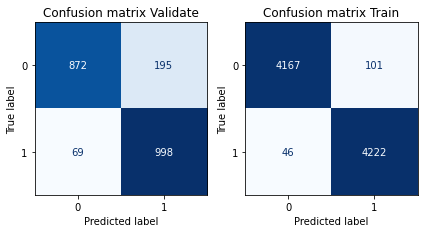

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=0.1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
reg_lambda 0.1


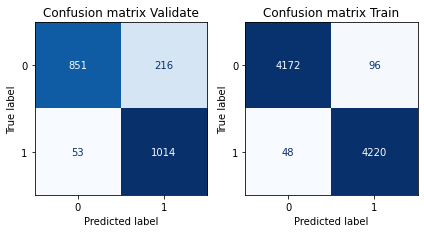

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=0.3,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
reg_lambda 0.3


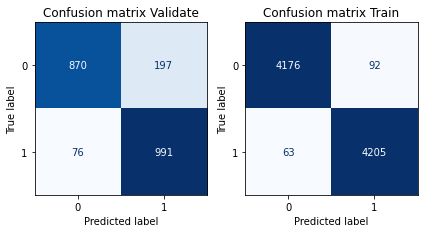

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=0.6,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
reg_lambda 0.6


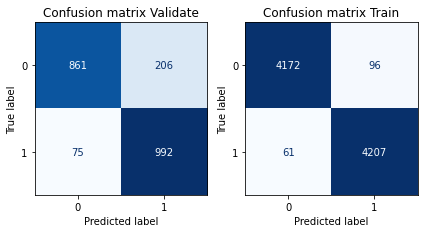

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=0.9,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
reg_lambda 0.9


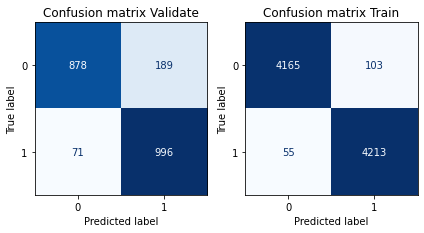

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1.0,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)
reg_lambda 1.0


In [15]:
for _,row in rf_param[rf_param['param']=='reg_lambda'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight = min_child_weight,Colsample_bytree= Colsample_bytree, subsample=subsample, reg_lambda=row.value) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

# Taking reg_lambda = , Tunning reg_alpha

In [16]:
reg_lambda=0.3

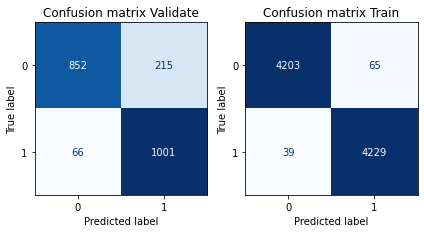

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0.1,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
reg_lambda 0.1


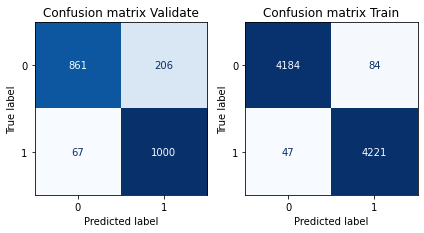

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0.3,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
reg_lambda 0.3


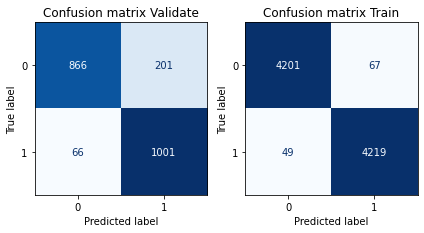

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0.6,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
reg_lambda 0.6


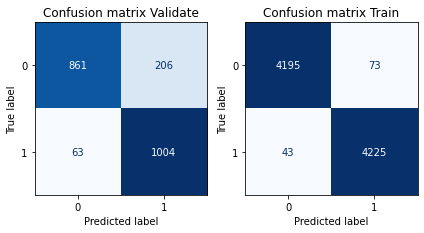

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0.9,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
reg_lambda 0.9


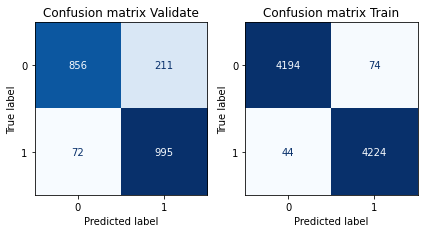

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=1.0,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)
reg_lambda 1.0


In [17]:
for _,row in rf_param[rf_param['param']=='reg_lambda'].iterrows():
    evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight = min_child_weight,Colsample_bytree= Colsample_bytree, subsample=subsample, reg_lambda=reg_lambda, reg_alpha=row.value) ,x_train,y_train,x_val,y_val)
    print(row.param,row.value)

In [18]:
reg_alpha =0.9

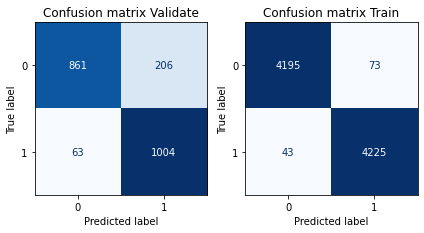

XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0.9,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)


(XGBClassifier(Colsample_bytree=1.0, base_score=0.5, booster='gbtree',
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, random_state=8, reg_alpha=0.9,
               reg_lambda=0.3, scale_pos_weight=1, subsample=0.6,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9986294882954513,
 0.9397280079122416)

In [19]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,max_depth= max_depth, min_child_weight = min_child_weight,Colsample_bytree= Colsample_bytree, subsample=subsample, reg_lambda=reg_lambda, reg_alpha=reg_alpha) ,x_train,y_train,x_val,y_val)

# Tunning using Hyperopt

In [20]:
print('max_depth=',max_depth,' min_child_weight=',min_child_weight, ' Colsample_bytree=',Colsample_bytree,' subsample=',subsample,'reg_lambda=',reg_lambda,'reg_alpha=',reg_alpha)

max_depth= 6  min_child_weight= 2  Colsample_bytree= 1.0  subsample= 0.6 reg_lambda= 0.3 reg_alpha= 0.9


In [21]:
space = {
    'max_depth': hp.choice('max_depth',range(1,10,1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.05),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.05),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'reg_lambda' : hp.quniform('reg_lambda', 0.1, 1, 0.05),
    'reg_alpha' : hp.quniform('reg_alpha', 0.1, 1, 0.05)
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1c76d83f760>,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x1c76fd5a070>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x1c76fd5a1c0>,
 'colsample_bytree': <hyperopt.pyll.base.Apply at 0x1c76fd5a310>,
 'subsample': <hyperopt.pyll.base.Apply at 0x1c76fd5a460>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x1c76fd5a5b0>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x1c76fd5a700>}

In [22]:
def objective(space):
   
    xgboost = xgb.XGBClassifier(
        random_state=8,
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        colsample_bytree = space['colsample_bytree'],
        subsample = space['subsample'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        use_label_encoder=False
    )
    
    acc = cross_val_score(xgboost, x_train, y_train, cv=10, scoring="accuracy").mean()

    return{'loss': 1-acc, 'status': STATUS_OK }
best1 = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)
print("Best: ", best1)

100%|█████████████████████████████████████████████████| 5/5 [00:33<00:00,  6.64s/trial, best loss: 0.15136136133387867]
Best:  {'colsample_bytree': 0.35000000000000003, 'learning_rate': 0.35000000000000003, 'max_depth': 8, 'min_child_weight': 10.0, 'reg_alpha': 0.9500000000000001, 'reg_lambda': 0.25, 'subsample': 0.6000000000000001}


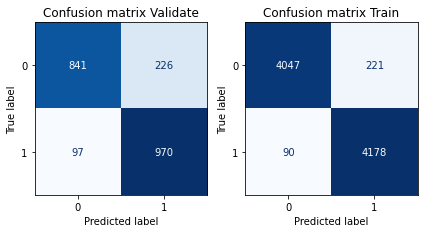

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35000000000000003, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.35000000000000003, max_delta_step=0, max_depth=8,
              min_child_weight=10.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0.9500000000000001, reg_lambda=0.25, scale_pos_weight=1,
              subsample=0.6000000000000001, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.35000000000000003, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               learning_rate=0.35000000000000003, max_delta_step=0, max_depth=8,
               min_child_weight=10.0, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0.9500000000000001, reg_lambda=0.25, scale_pos_weight=1,
               subsample=0.6000000000000001, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=None),
 0.9932393944956869,
 0.913026827663684)

In [23]:
xgboost1 = xgb.XGBClassifier(
    random_state=8,
    max_depth = int(best1['max_depth']),
    learning_rate = best1['learning_rate'],
    min_child_weight = best1['min_child_weight'],
    colsample_bytree = best1['colsample_bytree'],
    subsample = best1['subsample'],
    reg_lambda = best1['reg_lambda'],
    reg_alpha = best1['reg_alpha'],
    use_label_encoder=False
)
evm.eval_model(xgboost1,x_train,y_train,x_val,y_val)

# Changing the Scoring to see if I can get better result

In [24]:
def objective(space):
   
    xgboost = xgb.XGBClassifier(
        random_state=8,
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        colsample_bytree = space['colsample_bytree'],
        subsample = space['subsample'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        use_label_encoder=False
    )
    
    acc = cross_val_score(xgboost, x_train, y_train, cv=10, scoring="roc_auc").mean()

    return{'loss': 1-acc, 'status': STATUS_OK }
best2 = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)
print("Best: ", best2)

100%|█████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.39s/trial, best loss: 0.06843254662410936]
Best:  {'colsample_bytree': 0.35000000000000003, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 4.0, 'reg_alpha': 0.8, 'reg_lambda': 0.8500000000000001, 'subsample': 0.6000000000000001}


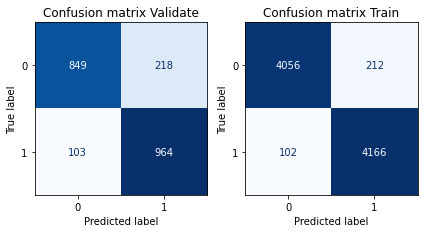

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35000000000000003, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=4.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0.8, reg_lambda=0.8500000000000001, scale_pos_weight=1,
              subsample=0.6000000000000001, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.35000000000000003, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               learning_rate=0.4, max_delta_step=0, max_depth=6,
               min_child_weight=4.0, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0.8, reg_lambda=0.8500000000000001, scale_pos_weight=1,
               subsample=0.6000000000000001, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=None),
 0.9940184973240848,
 0.9148169196188983)

In [25]:
xgboost2 = xgb.XGBClassifier(
    random_state=8,
    max_depth = int(best2['max_depth']),
    learning_rate = best2['learning_rate'],
    min_child_weight = best2['min_child_weight'],
    colsample_bytree = best2['colsample_bytree'],
    subsample = best2['subsample'],
    reg_lambda = best2['reg_lambda'],
    reg_alpha = best2['reg_alpha'],
    use_label_encoder=False,
)
evm.eval_model(xgboost2,x_train,y_train,x_val,y_val)

# Chaing Obective to see if I get better score

In [26]:
def objective(space):
   
    xgboost = xgb.XGBClassifier(
        random_state=8,
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        colsample_bytree = space['colsample_bytree'],
        subsample = space['subsample'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        use_label_encoder=False,
        objective ='binary:logistic'
    )
    
    acc = cross_val_score(xgboost, x_train, y_train, cv=10).mean()

    return{'loss': 1-acc, 'status': STATUS_OK }
best3 = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)
print("Best: ", best3)

100%|██████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.22s/trial, best loss: 0.1171512034944856]
Best:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1.0, 'reg_alpha': 0.2, 'reg_lambda': 0.45, 'subsample': 0.45}


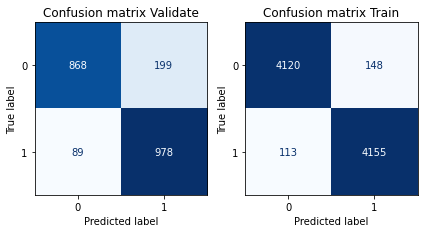

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
              reg_alpha=0.2, reg_lambda=0.45, scale_pos_weight=1,
              subsample=0.45, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=8,
               min_child_weight=1.0, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0.2, reg_lambda=0.45, scale_pos_weight=1,
               subsample=0.45, tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None),
 0.9963146328159517,
 0.9334231599953974)

In [27]:
xgboost3 = xgb.XGBClassifier(
    random_state=8,
    max_depth = int(best3['max_depth']),
    learning_rate = best3['learning_rate'],
    min_child_weight = best3['min_child_weight'],
    colsample_bytree = best3['colsample_bytree'],
    subsample = best3['subsample'],
    reg_lambda = best3['reg_lambda'],
    reg_alpha = best3['reg_alpha'],
    use_label_encoder=False,
    objective ='binary:logistic'
)
evm.eval_model(xgboost3,x_train,y_train,x_val,y_val)

# Changing eval_metric to see if i get any better score

In [28]:
def objective(space):
   
    xgboost = xgb.XGBClassifier(
        random_state=8,
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        colsample_bytree = space['colsample_bytree'],
        subsample = space['subsample'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        use_label_encoder=False,
        objective ='binary:logistic',
        eval_metric ='auc'
    )
    
    acc = cross_val_score(xgboost, x_train, y_train, cv=10).mean()

    return{'loss': 1-acc, 'status': STATUS_OK }
best4 = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)
print("Best: ", best4)

100%|█████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.94s/trial, best loss: 0.15639703924158022]
Best:  {'colsample_bytree': 0.45, 'learning_rate': 0.5, 'max_depth': 7, 'min_child_weight': 6.0, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 0.25, 'subsample': 0.4}


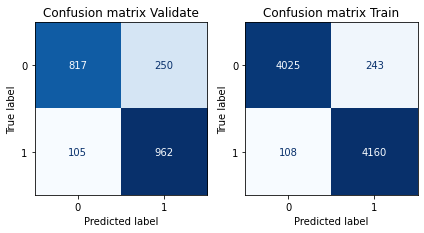

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.45, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=7, min_child_weight=6.0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8,
              reg_alpha=0.30000000000000004, reg_lambda=0.25,
              scale_pos_weight=1, subsample=0.4, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.45, eval_metric='auc',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.5, max_delta_step=0,
               max_depth=7, min_child_weight=6.0, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, random_state=8,
               reg_alpha=0.30000000000000004, reg_lambda=0.25,
               scale_pos_weight=1, subsample=0.4, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=None),
 0.9910340591784372,
 0.8917635567844749)

In [29]:
xgboost4 = xgb.XGBClassifier(
    random_state=8,
    max_depth = int(best4['max_depth']),
    learning_rate = best4['learning_rate'],
    min_child_weight = best4['min_child_weight'],
    colsample_bytree = best4['colsample_bytree'],
    subsample = best4['subsample'],
    reg_lambda = best4['reg_lambda'],
    reg_alpha = best4['reg_alpha'],
    use_label_encoder=False,
    objective ='binary:logistic',
    eval_metric ='auc'
)
evm.eval_model(xgboost4,x_train,y_train,x_val,y_val)

# Validating Both Models

(0.9218692752574237,
 0.8579460269865068,
 0.8678060690617371,
 0.8114807566862361,
 0.9325337331334332,
 0.8579460269865068)

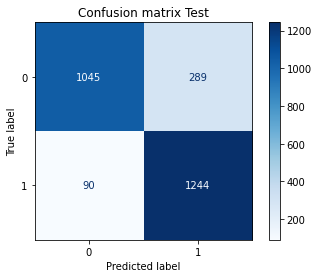

In [30]:
evm.get_performance(xgboost1, x_test, y_test, "Test", True)

(0.9257258552133228,
 0.8601949025487257,
 0.8685230877687699,
 0.8196939454424484,
 0.9235382308845578,
 0.8601949025487257)

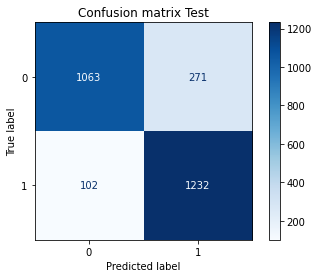

In [31]:
evm.get_performance(xgboost2, x_test, y_test, "Test", True)

(0.9438269995437065,
 0.8673163418290855,
 0.8743789921930447,
 0.8301886792452831,
 0.9235382308845578,
 0.8673163418290855)

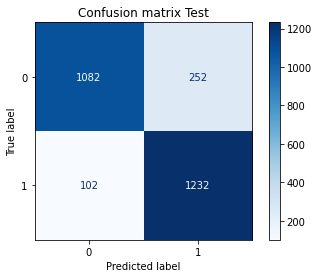

In [32]:
evm.get_performance(xgboost3, x_test, y_test, "Test", True)

(0.9083265713470099,
 0.8541979010494752,
 0.8635566467905997,
 0.8114700065919578,
 0.9227886056971514,
 0.8541979010494752)

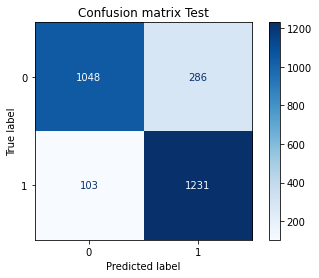

In [33]:
evm.get_performance(xgboost4, x_test, y_test, "Test", True)

# Going with Model xgboost1

In [34]:
def predict_extract_result(infile,mod,outfile):
    df = pd.read_csv(infile)
    df_cleaned = df.copy()
    print('Before Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    df_cleaned[ df_cleaned<0 ] = 0
    df_cleaned.loc[df_cleaned['3P Made'] <= 0, ['3P Made', '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] <= 0, ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] <= 0, ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > df_cleaned['3PA'], ['3P Made' , '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] > df_cleaned['FGA'], ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] > df_cleaned['FTA'], ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > 0, ['CALC3P%']] = df_cleaned['3P Made']/df_cleaned['3PA']*100
    df_cleaned.loc[df_cleaned['FGM'] > 0, ['CALCFG%']] =df_cleaned['FGM']/df_cleaned['FGA']*100
    df_cleaned.loc[df_cleaned['FTM'] > 0, ['CALCFT%']] = df_cleaned['FTM']/df_cleaned['FTA']*100
    print(df_cleaned.head(5))
    print('After Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    x = df_cleaned.drop(['3P%','FT%','FG%','Id_old','Id'],axis=1)
    print(df_cleaned.columns)
    y_pred_proba=mod.predict_proba(x)
    y_pred=mod.predict(x)
    print(np.unique(y_pred,return_counts=True))
    df_cleaned_result = df_cleaned.copy()
    df_cleaned_result['TARGET_5Yrs'] = y_pred_proba[:,0]
    print(df_cleaned_result['TARGET_5Yrs'].round().value_counts())
    df_cleaned_result.to_csv(outfile,index=False,columns=['Id', 'TARGET_5Yrs'])

In [35]:
predict_extract_result('../data/raw/test.csv',xgboost1,'../data/processed/TestResult_XG_UpSample.csv')

Before Data Clean
Column Name 3P Made,	Rows with Negative Value 775,	Percentage 20.400105290866016
Column Name 3PA,	Rows with Negative Value 773,	Percentage 20.34745985785733
Column Name 3P%,	Rows with Negative Value 435,	Percentage 11.450381679389313
Column Name BLK,	Rows with Negative Value 456,	Percentage 12.003158725980521
   Id_old  Id  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  OREB  DREB  \
0       1   0  56   9.1   4.0  1.6   3.7  43.7      0.1  0.3  ...   1.2   0.8   
1    8194   1  43  19.3  10.1  3.7   8.1  46.0      0.6  1.7  ...   0.5   0.9   
2       3   2  82  33.9  11.3  4.9  10.6  45.6      0.5  1.9  ...   1.3   3.3   
3    8196   3  86  44.7  18.8  6.8  15.9  42.9      0.5  1.8  ...   1.5   3.2   
4    8197   4  58  12.3   4.7  1.6   4.0  40.0      0.5  1.7  ...   0.2   0.6   

   REB  AST  STL  BLK  TOV    CALC3P%    CALCFG%    CALCFT%  
0  1.7  0.4  0.2  0.3  0.8  33.333333  43.243243  58.333333  
1  1.5  3.5  0.6  0.0  1.8  35.294118  45.679012  72.000000 